# Data Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d_aa = {'Cys': 'C', 'Asp': 'D', 'Ser': 'S', 'Gln': 'Q', 'Lys': 'K',
        'Ile': 'I', 'Pro': 'P', 'Thr': 'T', 'Phe': 'F', 'Asn': 'N',
        'Gly': 'G', 'His': 'H', 'Leu': 'L', 'Arg': 'R', 'Trp': 'W',
        'Ala': 'A', 'Val': 'V', 'Glu': 'E', 'Tyr': 'Y', 'Met': 'M',
        'Ter': 'STOP'}
aa_d = {k:v for v,k in d_aa.items()}

In [3]:
# Load the dataset with the mutants and the activity of each mutant
mct8_variants_activity = pd.read_csv('MCT8_Variants_Activity.csv')

In [4]:
mct8_variants_activity.head()

,Residue,ShortPosition,LongPosition,Ala,Val,Tyr,Trp,Thr,Ser,Pro,...,Leu,Ile,His,Gly,Gln,Glu,Cys,Asp,Asn,Arg
0,Met,-73,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gly,-72,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arg,-71,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gly,-70,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gly,-69,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
mct8_variants_activity['AAnumber'] = mct8_variants_activity.Residue+mct8_variants_activity.LongPosition.astype(str)
mct8_variants_activity = mct8_variants_activity.iloc[:, 3:]
mct8_variants_activity.set_index('AAnumber', inplace=True)

In [6]:
aa_change = []
activity = []
for i in mct8_variants_activity.index:    
    for j in mct8_variants_activity.loc[i][mct8_variants_activity.loc[i].notnull()].index:
        aa_change.append(i+j)
        activity.append(mct8_variants_activity.loc[i, j])

In [7]:
mct8_variants_activity = pd.DataFrame()
mct8_variants_activity['AA_change'] = aa_change
mct8_variants_activity['Activity'] = activity
mct8_variants_activity.to_csv('MCT8_Variants_Activity_T4.csv')

In [8]:
mct8_variants_activity.shape

(486, 2)

---

In [9]:
# Load the dataset with the mutants and the protein expression of each mutant
mct8_variants_expression = pd.read_csv('MCT8_Variants_Expression.csv')
mct8_variants_expression['AAnumber'] = mct8_variants_expression.Residue+mct8_variants_expression.LongPosition.astype(str)
mct8_variants_expression = mct8_variants_expression.iloc[:, 3:]
mct8_variants_expression.set_index('AAnumber', inplace=True)

In [10]:
aa_change = []
expression = []
for i in mct8_variants_expression.index:    
    for j in mct8_variants_expression.loc[i][mct8_variants_expression.loc[i].notnull()].index:
        aa_change.append(i+j)
        expression.append(mct8_variants_expression.loc[i, j])

In [11]:
mct8_variants_expression = pd.DataFrame()
mct8_variants_expression['AA_change'] = aa_change
mct8_variants_expression['Expression'] = expression
mct8_variants_expression.to_csv('MCT8_Variants_Expression.csv')

In [12]:
mct8_variants_expression.shape

(72, 2)

---

In [13]:
# Load the dataset with the mutants and the protein expression of each mutant
mct8_variants_pmexpression = pd.read_csv('MCT8_Variants_PMExpression.csv')
mct8_variants_pmexpression['AAnumber'] = mct8_variants_pmexpression.Residue+mct8_variants_pmexpression.LongPosition.astype(str)
mct8_variants_pmexpression = mct8_variants_pmexpression.iloc[:, 3:]
mct8_variants_pmexpression.set_index('AAnumber', inplace=True)

In [14]:
aa_change = []
pmexpression = []
for i in mct8_variants_pmexpression.index:    
    for j in mct8_variants_pmexpression.loc[i][mct8_variants_pmexpression.loc[i].notnull()].index:
        aa_change.append(i+j)
        pmexpression.append(mct8_variants_pmexpression.loc[i, j])

In [15]:
mct8_variants_pmexpression = pd.DataFrame()
mct8_variants_pmexpression['AA_change'] = aa_change
mct8_variants_pmexpression['PMExpression'] = pmexpression
mct8_variants_pmexpression.to_csv('MCT8_Variants_PMExpression_2.csv')

In [16]:
mct8_variants_pmexpression.shape

(71, 2)

---

In [17]:
# Merge the information of variants experiments
for i in mct8_variants_activity.AA_change.tolist():
    expression_value = mct8_variants_expression.loc[mct8_variants_expression.AA_change == i, 'Expression']
    pmexpression_value = mct8_variants_pmexpression.loc[mct8_variants_pmexpression.AA_change == i, 'PMExpression']
    if not expression_value.empty:
        mct8_variants_activity.loc[mct8_variants_activity.AA_change == i, 'Expression'] = expression_value.values[0]
    if not pmexpression_value.empty:
        mct8_variants_activity.loc[mct8_variants_activity.AA_change == i, 'PMExpression'] = pmexpression_value.values[0]

In [18]:
mct8_variants_activity['AAnumber'] = mct8_variants_activity.AA_change.str[:-3]
mct8_variants_activity.iloc[50:60]

,AA_change,Activity,Expression,PMExpression,AAnumber
50,Glu205Ala,91.6,NaN,NaN,Glu205
51,Glu206Ala,91.6,NaN,NaN,Glu206
52,Lys207Ala,98.1,NaN,NaN,Lys207
53,Glu208Ala,98.1,NaN,NaN,Glu208
54,Lys209Ala,95.4,NaN,NaN,Lys209
55,Asn210Ala,95.4,NaN,NaN,Asn210
56,Arg211Ala,105.7,NaN,NaN,Arg211
57,Gln212Ala,105.7,NaN,NaN,Gln212
58,Gln212Glu,112.1,NaN,NaN,Gln212
59,Val213Ala,105.7,NaN,NaN,Val213


In [20]:
# Save this dataset that contains the activity, protein expression and plasma membrane expression of each variant
mct8_variants_activity.to_csv('MCT8_Variants_T4.csv')

---

In [21]:
mct8_variants_activity = pd.read_csv('MCT8_Variants_T4.csv', index_col=0)
mct8_variants_activity.head()

,AA_change,Activity,Expression,PMExpression,AAnumber
0,Ser82Ala,100.409954,NaN,NaN,Ser82
1,Ser102Ala,103.619861,NaN,NaN,Ser102
2,Ser107Ala,110.037882,NaN,NaN,Ser107
3,Ser107Asp,115.800000,NaN,NaN,Ser107
4,Pro169Ala,95.800000,NaN,NaN,Pro169


In [22]:
# Load the features that describe MCT8 protein
mct8_features = pd.read_csv('MCT8_features.csv')
mct8_features['AAnumber'] = mct8_features.Residue+mct8_features.LongPosition.astype(str)
mct8_features.head()

,Residue,ShortPosition,LongPosition,TMD,ICL,ECL,membrane facing,channel facing,Burried,Membrane interacting Surface area (higher score indicates stronger interaction with membrane),...,substrate interaction,orientation of substrate interacting res,TMD binder,helix structure,Loop conformation,CS vs All MCT8 (extracted with WASABI),CS vs Mammal MCT8,"CS vs functionally tested MCT8s (mus musculus, rattus norvegicus, danio rerio, gallus gallus, xenopus laevis)","CS vs other hMCTs (MCT1, MCT2, MCT3, MCT4, MCT5, MCT6, MCT7, MCT9, MCT10, MCT11, MCT12, MCT13, MCT14)",AAnumber
0,Met,-73,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.501,-0.574,-0.189,-0.287,Met1
1,Gly,-72,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.478,-0.503,-0.189,-0.287,Gly2
2,Arg,-71,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.559,0.173,-0.189,-0.287,Arg3
3,Gly,-70,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.555,1.850,-0.189,-0.287,Gly4
4,Gly,-69,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.618,0.059,-0.189,-0.287,Gly5


In [23]:
mct8_features.shape

(613, 31)

In [24]:
# The center of mass of MCT8 alphafold structure outward-open 
#(without N and C terminus unstructured) is [  -6.396,   1.605,  -2.806]
from Bio.PDB import PDBParser

parser = PDBParser()
structure = parser.get_structure('MCT8', 'AF-P36021-F1-model_v1.pdb')

x = -6.396
y = 1.605
z = -2.806

distCOM_AF = []
for r in structure.get_residues():
    distance = np.sqrt((x - r['CA'].get_coord()[0])**2+(y - r['CA'].get_coord()[1])**2+(z - r['CA'].get_coord()[2])**2)
    distCOM_AF.append(distance)

mct8_features['dCOM_AF_OW'] = [np.max(distCOM_AF)]*74+distCOM_AF

In [25]:
# The center of mass of MCT8 homologymodel structure inward-opne 
#(without N and C terminus unstructured) is [   0.860,   0.124,   0.196]
from Bio.PDB import PDBParser

parser = PDBParser()
structure = parser.get_structure('MCT8', 'MCT8inward.pdb')

x = 0.860
y = 0.124
z = 0.196

distCOM_HM_IW = []
for r in structure.get_residues():
    distance = np.sqrt((x - r['CA'].get_coord()[0])**2+(y - r['CA'].get_coord()[1])**2+(z - r['CA'].get_coord()[2])**2)
    distCOM_HM_IW.append(distance)

    
mct8_features.loc[160:589, 'dCOM_HM_IW'] = distCOM_HM_IW

In [26]:
# The center of mass of MCT8 homology model structure outward-open 
#(without N and C terminus unstructured) is [   0.891,   0.336,  -0.915]
from Bio.PDB import PDBParser

parser = PDBParser()
structure = parser.get_structure('MCT8', 'MCT8outward.pdb')

x = 0.891
y = 0.336
z = -0.915

distCOM_HM_OW = []
for r in structure.get_residues():
    distance = np.sqrt((x - r['CA'].get_coord()[0])**2+(y - r['CA'].get_coord()[1])**2+(z - r['CA'].get_coord()[2])**2)
    distCOM_HM_OW.append(distance)

mct8_features.loc[158:602, 'dCOM_HM_OW'] = distCOM_HM_OW

In [27]:
# mct8_features have missing values until position (long) 159 and after position 603.
# The reliable positions are located between Gly161 and Met591
mct8_features = mct8_features.loc[160:589]
mct8_features

,Residue,ShortPosition,LongPosition,TMD,ICL,ECL,membrane facing,channel facing,Burried,Membrane interacting Surface area (higher score indicates stronger interaction with membrane),...,helix structure,Loop conformation,CS vs All MCT8 (extracted with WASABI),CS vs Mammal MCT8,"CS vs functionally tested MCT8s (mus musculus, rattus norvegicus, danio rerio, gallus gallus, xenopus laevis)","CS vs other hMCTs (MCT1, MCT2, MCT3, MCT4, MCT5, MCT6, MCT7, MCT9, MCT10, MCT11, MCT12, MCT13, MCT14)",AAnumber,dCOM_AF_OW,dCOM_HM_IW,dCOM_HM_OW
160,Gly,87,161,0.0,1.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,1.402,0.590,1.652,1.294,Gly161,40.991276,43.974030,24.781752
161,Thr,88,162,0.0,1.0,0.0,0.0,0.0,0.0,0.08,...,0.0,0.0,1.378,0.874,1.782,1.757,Thr162,38.006656,41.568072,24.184929
162,Ala,89,163,0.0,1.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,2.369,2.979,1.000,1.377,Ala163,35.161901,39.152801,26.777752
163,Arg,90,164,0.0,1.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,2.470,0.173,2.298,1.644,Arg164,34.684597,35.602310,29.092915
164,Gly,91,165,0.0,1.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,2.453,0.054,2.000,2.344,Gly165,31.091276,33.306259,30.381777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,Ser,512,586,0.0,1.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.142,-0.797,0.180,1.680,Ser586,39.089815,40.071799,29.600377
586,Ser,513,587,0.0,1.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,-0.265,-0.797,2.007,1.159,Ser587,41.808204,42.155481,32.497154
587,Lys,514,588,0.0,1.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.395,-0.477,1.424,0.318,Lys588,43.840712,39.283908,33.775366
588,Asp,515,589,0.0,1.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,-0.295,-0.774,0.966,-0.690,Asp589,43.603963,39.207962,30.716801


In [28]:
mct8_features.shape

(430, 34)

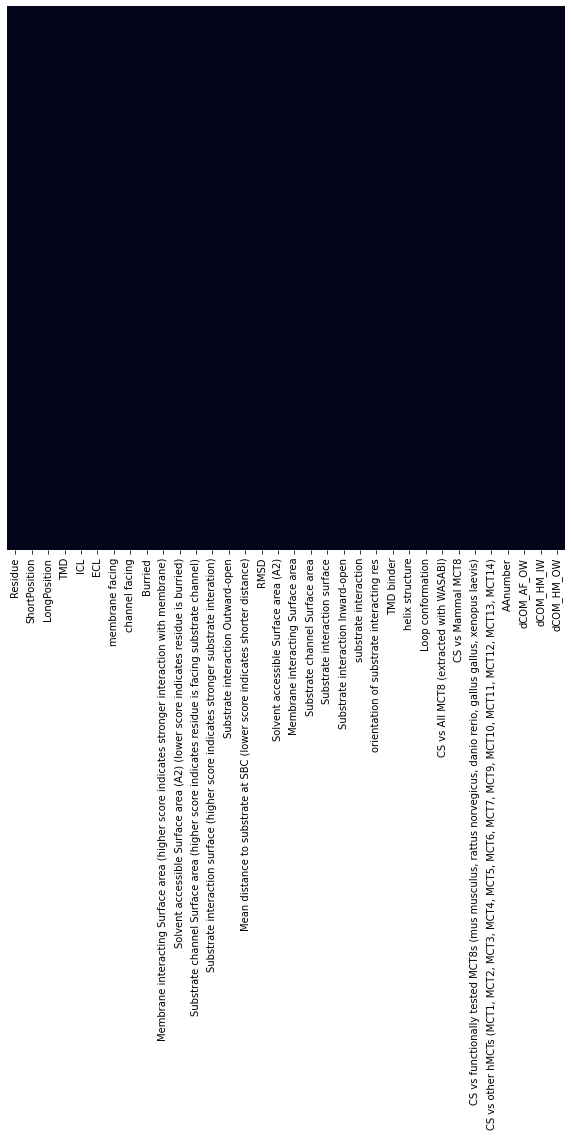

In [29]:
# Heatmap with missing values in this dataset that contains describing features
# white = "missing value"
plt.figure(figsize=(10,10))
sns.heatmap(mct8_features.isnull(), yticklabels = False, cbar = False)
plt.show()

In [30]:
mct8_features.to_csv('MCT8_features_final.csv')

No missing values

In [31]:
# Merge of the variants dataset with the features dataset
mct8_variants = mct8_variants_activity.merge(mct8_features, on=['AAnumber'])
mct8_variants.head()

,AA_change,Activity,Expression,PMExpression,AAnumber,Residue,ShortPosition,LongPosition,TMD,ICL,...,TMD binder,helix structure,Loop conformation,CS vs All MCT8 (extracted with WASABI),CS vs Mammal MCT8,"CS vs functionally tested MCT8s (mus musculus, rattus norvegicus, danio rerio, gallus gallus, xenopus laevis)","CS vs other hMCTs (MCT1, MCT2, MCT3, MCT4, MCT5, MCT6, MCT7, MCT9, MCT10, MCT11, MCT12, MCT13, MCT14)",dCOM_AF_OW,dCOM_HM_IW,dCOM_HM_OW
0,Pro169Ala,95.8,NaN,NaN,Pro169,Pro,95,169,0.0,1.0,...,0.0,0.0,0.0,-0.834,-0.043,-0.904,-0.804,26.721874,31.478833,22.145371
1,Glu170Ala,29.6,NaN,NaN,Glu170,Glu,96,170,0.0,1.0,...,0.0,0.0,0.0,-0.728,-0.107,-0.175,-1.963,25.035116,33.240073,22.217668
2,Gly171Ala,65.6,NaN,NaN,Gly171,Gly,97,171,0.0,1.0,...,0.0,0.0,0.0,-0.950,-0.356,-0.853,-1.787,25.109739,32.419724,23.758240
3,Gly172Ala,78.8,NaN,NaN,Gly172,Gly,98,172,0.0,1.0,...,0.0,0.0,0.0,-0.794,-0.350,-0.853,-1.482,26.992771,29.003213,24.153347
4,Phe173Ala,91.4,NaN,NaN,Phe173,Phe,99,173,1.0,0.0,...,1.0,0.0,0.0,0.823,0.270,-0.845,-1.428,25.231248,27.468865,23.194036


In [32]:
mct8_variants.shape

(480, 38)

In [33]:
# Load the tables that quantified the amino acid changes
AAindex_all = pd.read_csv('AAindex_all.csv', index_col=0)
AAindex_all.reset_index(inplace=True)
AAindex_all.rename(columns={'index':'AA change'}, inplace=True)
AAindex_all

,AA change,MEHP950101,KOSJ950113,KOSJ950110,OVEJ920103,DAYM780302,MUET010101,LUTR910102,DOSZ010104,FEND850101,...,KOSJ950102,KOSJ950111,OVEJ920104,KOLA920101,HENS920103,LUTR910104,WEIL970102,GIAG010101,DOSZ010101,KOSJ950114
0,A-C,1.41,1.0,1.1,0.000,-6.0,2.5,1.0,0.01,2.0,...,1.1,2.1,0.013,0.0,-1.0,8.0,0.0,-0.4,38.6,1.7
1,A-D,1.31,1.1,1.3,0.025,-3.0,-6.5,6.0,-2.43,4.0,...,1.6,1.6,0.055,0.0,-3.0,-1.0,0.0,-1.0,-10.7,0.6
2,A-E,1.34,1.2,1.8,0.047,-2.0,-7.0,7.0,-1.66,4.0,...,1.6,0.9,0.068,9.0,-2.0,4.0,-2.0,-5.7,-10.7,1.0
3,A-F,0.94,0.2,0.1,0.023,-7.0,0.0,-24.0,-2.14,2.0,...,0.1,0.2,0.031,0.0,-4.0,-18.0,2.0,-0.2,18.9,0.3
4,A-G,1.11,3.0,3.0,0.086,-1.0,0.5,5.0,-0.02,5.0,...,0.4,3.4,0.067,0.0,0.0,5.0,-1.0,1.8,-6.0,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Y-R,0.75,0.4,0.8,0.032,-9.0,-5.5,3.0,-1.76,1.0,...,0.9,0.3,0.024,5.0,-4.0,-3.0,1.0,-0.2,-6.5,0.4
376,Y-S,0.63,0.7,1.2,0.026,-6.0,-2.0,-6.0,-2.98,3.0,...,1.6,0.2,0.018,6.6,-3.0,-10.0,1.0,0.1,-3.9,0.2
377,Y-T,0.65,0.7,0.6,0.022,-6.0,-2.5,-8.0,-2.64,2.0,...,0.1,0.8,0.019,9.0,-3.0,-9.0,1.0,-0.4,-5.3,0.5
378,Y-V,0.67,1.2,0.3,0.023,-6.0,-2.5,-2.0,0.15,3.0,...,0.8,0.4,0.028,0.0,-3.0,-14.0,1.0,-0.1,24.6,0.6


In [34]:
mct8_variants['AA change'] = mct8_variants.apply(lambda x: d_aa[x['AA_change'][:3]]+'-'+d_aa[x['AA_change'][-3:]], axis=1)
mct8_variants['AA change']

0      P-A
1      E-A
2      G-A
3      G-A
4      F-A
      ... 
475    S-D
476    S-A
477    S-D
478    K-A
479    K-A
Name: AA change, Length: 480, dtype: object

In [35]:
# Merge variants dataset with AA change dataset
mct8_variants = mct8_variants.merge(AAindex_all, on=['AA change'])
mct8_variants.shape

(480, 130)

In [36]:
mct8_variants.columns[:50]

Index(['AA_change', 'Activity', 'Expression', 'PMExpression', 'AAnumber',
       'Residue', 'ShortPosition', 'LongPosition', 'TMD', 'ICL', 'ECL',
       'membrane facing', 'channel facing', 'Burried',
       'Membrane interacting Surface area (higher score indicates stronger interaction with membrane)',
       'Solvent accessible Surface area (A2) (lower score indicates residue is burried)',
       'Substrate channel Surface area (higher score indicates residue is facing substrate channel)',
       'Substrate interaction surface (higher score indicates stronger substrate interation)',
       'Substrate interaction Outward-open',
       'Mean distance to substrate at SBC (lower score indicates shorter distance)',
       'RMSD', 'Solvent accessible Surface area (A2)',
       'Membrane interacting Surface area', 'Substrate channel Surface area',
       'Substrate interaction surface', 'Substrate interaction Inward-open',
       'substrate interaction', 'orientation of substrate interactin

---

### Load the datasets with the ddG calculations...

**MAESTRO**

In [37]:
ddg_homologymodel_outward = pd.read_csv('MCT8_ddG_outward.csv')
ddg_homologymodel_outward['AA_change'] = ddg_homologymodel_outward.apply(
                                         lambda x: aa_d[x['substitution'][0]]+x['substitution'].split('.')[0][1:]+aa_d[x['substitution'][-2]], 
                                         axis=1)
ddg_homologymodel_outward.rename(columns={'ddG_pred':'MAESTRO_ddG_HM_OW', 'c_pred': 'c_HM_OW'}, inplace=True)
ddg_homologymodel_outward = ddg_homologymodel_outward[['AA_change', 'MAESTRO_ddG_HM_OW', 'c_HM_OW']]
ddg_homologymodel_outward['MAESTRO_ddG_HM_OW'] = ddg_homologymodel_outward['MAESTRO_ddG_HM_OW'].astype(float)
ddg_homologymodel_outward['c_HM_OW'] = ddg_homologymodel_outward['c_HM_OW'].astype(float)
ddg_homologymodel_outward.drop_duplicates(subset='AA_change', keep='first', inplace=True)
ddg_homologymodel_outward.iloc[100:110]

,AA_change,MAESTRO_ddG_HM_OW,c_HM_OW
100,Arg90Ser,1.198,0.705
101,Arg90Pro,1.727,0.705
102,Arg90Phe,1.752,0.726
103,Arg90Met,1.489,0.710
104,Arg90Lys,1.690,0.702
105,Arg90Leu,1.819,0.702
106,Arg90Ile,1.713,0.709
107,Arg90His,1.853,0.725
108,Arg90Gly,1.194,0.716
109,Arg90Gln,1.191,0.702


In [38]:
ddg_homologymodel_inward = pd.read_csv('MCT8_ddG_inward.csv')
ddg_homologymodel_inward['AA_change'] = ddg_homologymodel_inward.apply(
                                        lambda x: aa_d[x['substitution'][0]]+x['substitution'].split('.')[0][1:]+aa_d[x['substitution'][-2]], 
                                        axis=1)
ddg_homologymodel_inward.rename(columns={'ddG_pred':'MAESTRO_ddG_HM_IW', 'c_pred': 'c_HM_IW'}, inplace=True)
ddg_homologymodel_inward = ddg_homologymodel_inward[['AA_change', 'MAESTRO_ddG_HM_IW', 'c_HM_IW']]
ddg_homologymodel_inward.drop_duplicates(subset='AA_change', keep='first', inplace=True)
ddg_homologymodel_inward.iloc[100:110]

,AA_change,MAESTRO_ddG_HM_IW,c_HM_IW
100,Phe92Ser,2.0000,0.664205
101,Phe92Pro,2.0000,0.676380
102,Phe92Met,2.0000,0.696545
103,Phe92Lys,0.7761,0.704545
104,Phe92Leu,2.0000,0.696406
105,Phe92Ile,2.0000,0.686620
106,Phe92His,1.0000,0.716316
107,Phe92Gly,2.0000,0.627605
108,Phe92Gln,1.0000,0.680779
109,Phe92Glu,1.0000,0.667893


In [39]:
ddg_alphafold_outward = pd.read_csv('MCT8_ddG_alphafold.csv')
ddg_alphafold_outward['AA_change'] = ddg_alphafold_outward.apply(
                                     lambda x: aa_d[x['substitution'][0]]+x['substitution'].split('.')[0][1:]+aa_d[x['substitution'][-2]], 
                                     axis=1)
ddg_alphafold_outward.rename(columns={'ddG_pred':'MAESTRO_ddG_AF_OW', 'c_pred': 'c_AF_OW'}, inplace=True)
ddg_alphafold_outward = ddg_alphafold_outward[['AA_change', 'MAESTRO_ddG_AF_OW', 'c_AF_OW']]
ddg_alphafold_outward.drop_duplicates(subset='AA_change', keep='first', inplace=True)
ddg_alphafold_outward.iloc[100:110]

,AA_change,MAESTRO_ddG_AF_OW,c_AF_OW
100,Arg90Ser,0.911,0.655
101,Arg90Pro,0.991,0.636
102,Arg90Phe,1.672,0.671
103,Arg90Met,1.811,0.659
104,Arg90Lys,1.406,0.663
105,Arg90Leu,1.472,0.672
106,Arg90Ile,1.845,0.658
107,Arg90His,1.559,0.684
108,Arg90Gly,1.074,0.665
109,Arg90Gln,1.478,0.652


In [40]:
mct8_ddg = ddg_homologymodel_outward
for i in mct8_ddg.AA_change.tolist():
    #print(i)
    ddg_inward = ddg_homologymodel_inward.loc[ddg_homologymodel_inward.AA_change == i, 'MAESTRO_ddG_HM_IW']
    c_inward = ddg_homologymodel_inward.loc[ddg_homologymodel_inward.AA_change == i, 'c_HM_IW']
    ddg_alphafold = ddg_alphafold_outward.loc[ddg_alphafold_outward.AA_change == i, 'MAESTRO_ddG_AF_OW']
    c_alphafold = ddg_alphafold_outward.loc[ddg_alphafold_outward.AA_change == i, 'c_AF_OW']
    if not ddg_inward.empty:
        mct8_ddg.loc[mct8_ddg.AA_change == i, 'MAESTRO_ddG_HM_IW'] = ddg_inward.astype(float).values[0]
        mct8_ddg.loc[mct8_ddg.AA_change == i, 'c_HM_IW'] = c_inward.astype(float).values[0]
    if not ddg_alphafold.empty:
        mct8_ddg.loc[mct8_ddg.AA_change == i, 'MAESTRO_ddG_AF_OW'] = ddg_alphafold.astype(float).values[0]
        mct8_ddg.loc[mct8_ddg.AA_change == i, 'c_AF_OW'] = c_alphafold.astype(float).values[0]
mct8_ddg.shape

(8455, 7)

In [41]:
mct8_ddg.iloc[100:110]

,AA_change,MAESTRO_ddG_HM_OW,c_HM_OW,MAESTRO_ddG_AF_OW,c_AF_OW,MAESTRO_ddG_HM_IW,c_HM_IW
100,Arg90Ser,1.198,0.705,0.911,0.655,1.0,0.685877
101,Arg90Pro,1.727,0.705,0.991,0.636,2.0,0.681588
102,Arg90Phe,1.752,0.726,1.672,0.671,2.0,0.704379
103,Arg90Met,1.489,0.710,1.811,0.659,2.0,0.699116
104,Arg90Lys,1.690,0.702,1.406,0.663,2.0,0.696399
105,Arg90Leu,1.819,0.702,1.472,0.672,2.0,0.699635
106,Arg90Ile,1.713,0.709,1.845,0.658,2.0,0.699184
107,Arg90His,1.853,0.725,1.559,0.684,2.0,0.704192
108,Arg90Gly,1.194,0.716,1.074,0.665,1.0,0.703646
109,Arg90Gln,1.191,0.702,1.478,0.652,1.0,0.692350


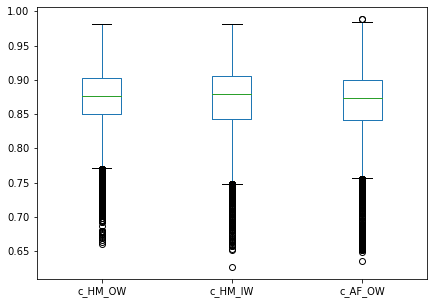

In [42]:
# Plot of ddg calculation confidence 
plt.figure(figsize=(7,5))
mct8_ddg[['c_HM_OW', 'c_HM_IW', 'c_AF_OW']].boxplot(grid=False)
plt.show()

The ddG calculation have higher confidence with the homology model.
The calculations done using the alphafold model will not be included because all the structural parameters have been calculated using the homology model.

In [43]:
mct8_ddg = mct8_ddg[['AA_change', 'MAESTRO_ddG_HM_OW', 'MAESTRO_ddG_HM_IW', 'MAESTRO_ddG_AF_OW']]
mct8_ddg['AA_change'] = mct8_ddg.apply(lambda x: x['AA_change'][:3]+str(int(x['AA_change'][3:-3])+74)+x['AA_change'][-3:],
                                       axis=1)

/tmp/ipykernel_4475/1583400813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mct8_ddg['AA_change'] = mct8_ddg.apply(lambda x: x['AA_change'][:3]+str(int(x['AA_change'][3:-3])+74)+x['AA_change'][-3:],


In [44]:
# Merge the ddG calculations with the variants dataset
mct8_variants = mct8_variants.merge(mct8_ddg, on=['AA_change'])
mct8_variants.head()

,AA_change,Activity,Expression,PMExpression,AAnumber,Residue,ShortPosition,LongPosition,TMD,ICL,...,KOLA920101,HENS920103,LUTR910104,WEIL970102,GIAG010101,DOSZ010101,KOSJ950114,MAESTRO_ddG_HM_OW,MAESTRO_ddG_HM_IW,MAESTRO_ddG_AF_OW
0,Pro169Ala,95.8,NaN,NaN,Pro169,Pro,95,169,0.0,1.0,...,0.0,-1.0,5.0,1.0,2.0,4.9,4.6,0.358,0.709952,0.684
1,Pro233Ala,24.7,NaN,NaN,Pro233,Pro,159,233,1.0,0.0,...,0.0,-1.0,5.0,1.0,2.0,4.9,4.6,-0.507,-0.502055,-0.499
2,Pro289Ala,69.8,NaN,NaN,Pro289,Pro,215,289,1.0,0.0,...,0.0,-1.0,5.0,1.0,2.0,4.9,4.6,-0.560,-0.293183,-0.556
3,Pro321Ala,81.1,NaN,NaN,Pro321,Pro,247,321,1.0,0.0,...,0.0,-1.0,5.0,1.0,2.0,4.9,4.6,-0.311,-0.329877,-0.507
4,Pro356Ala,73.1,NaN,NaN,Pro356,Pro,282,356,0.0,1.0,...,0.0,-1.0,5.0,1.0,2.0,4.9,4.6,0.328,1.000000,0.183


In [45]:
mct8_variants['Variant'] = mct8_variants.apply(lambda x: d_aa[x.AA_change[:3]]+str(x.LongPosition)+d_aa[x.AA_change[-3:]], axis=1)

In [46]:
mct8_variants.iloc[0]

AA_change            Pro169Ala
Activity                  95.8
Expression                 NaN
PMExpression               NaN
AAnumber                Pro169
                       ...    
KOSJ950114                 4.6
MAESTRO_ddG_HM_OW        0.358
MAESTRO_ddG_HM_IW     0.709952
MAESTRO_ddG_AF_OW        0.684
Variant                  P169A
Name: 0, Length: 134, dtype: object

**FoldX**

In [47]:
foldx_alphafold = pd.read_csv('FoldXMatrix-MCT8.csv', index_col=0, sep='\t')
foldx_alphafold.head()

,G,A,R,N,D,C,E,Q,H,I,L,K,M,F,P,S,T,W,Y,V
Motif,,,,,,,,,,,,,,,,,,,,
M75,0.2,0.2,-0.1,0.2,0.3,0.2,0.3,0.1,0.3,0.3,0.3,-0.1,0.0,0.3,0.3,0.2,0.3,0.0,0.3,0.3
A76,-0.3,0.0,1.3,-0.2,1.6,1.6,1.4,1.6,-0.4,1.7,-0.4,1.5,1.4,1.0,1.0,0.0,1.7,-0.8,1.1,1.9
L77,-0.2,-0.1,-0.8,-0.3,-0.2,-0.2,0.0,-0.4,-0.2,0.5,0.0,-0.7,-0.2,-0.1,3.9,-0.5,0.0,-0.1,-0.1,0.3
Q78,-0.1,0.1,-0.1,-0.2,-0.1,0.0,0.1,0.0,0.0,0.3,-0.1,-0.1,0.1,0.0,1.3,0.0,0.2,0.3,0.1,0.3
S79,-0.1,0.0,-0.2,-0.1,0.0,0.1,0.1,0.0,0.2,0.0,-0.1,-0.1,0.1,-0.1,0.6,0.0,0.3,0.1,-0.1,0.4


In [48]:
for i in mct8_variants.index:
    variant = mct8_variants.loc[i, 'Variant']
    mct8_variants.loc[i, 'FoldX_ddG_AF_OW'] = foldx_alphafold.loc[variant[:-1], variant[-1]]   

In [49]:
foldx_outward = pd.read_csv('FoldXMatrix-MCT8outward.csv', index_col=0, sep='\t')

for i in mct8_variants.index:
    variant = mct8_variants.loc[i, 'Variant']
    mct8_variants.loc[i, 'FoldX_ddG_HM_OW'] = foldx_outward.loc[variant[:-1], variant[-1]]   

In [50]:
foldx_inward = pd.read_csv('FoldXMatrix-MCT8inward.csv', index_col=0, sep='\t')

for i in mct8_variants.index:
    variant = mct8_variants.loc[i, 'Variant']
    mct8_variants.loc[i, 'FoldX_ddG_HM_IW'] = foldx_inward.loc[variant[:-1], variant[-1]]   

In [51]:
mct8_variants.shape

(480, 137)

In [52]:
for i in mct8_variants.columns:
    print(i)

AA_change
Activity
Expression
PMExpression
AAnumber
Residue
ShortPosition
LongPosition
TMD
ICL
ECL
membrane facing
channel facing
Burried
Membrane interacting Surface area (higher score indicates stronger interaction with membrane)
Solvent accessible Surface area (A2) (lower score indicates residue is burried)
Substrate channel Surface area (higher score indicates residue is facing substrate channel)
Substrate interaction surface (higher score indicates stronger substrate interation)
Substrate interaction Outward-open
Mean distance to substrate at SBC (lower score indicates shorter distance)
RMSD
Solvent accessible Surface area (A2)
Membrane interacting Surface area
Substrate channel Surface area
Substrate interaction surface
Substrate interaction Inward-open
substrate interaction
orientation of substrate interacting res
TMD binder
helix structure
Loop conformation
CS vs All MCT8 (extracted with WASABI)
CS vs Mammal MCT8
CS vs functionally tested MCT8s (mus musculus, rattus norvegicus,

In [53]:
# Drop some columns that aren't relevant for the EDA

mct8_EDA = mct8_variants.drop(columns=['AAnumber', 'Residue', 'ShortPosition', 'AA change', 'Variant',
                                       'Substrate interaction Outward-open', 'Substrate interaction Inward-open'])
mct8_EDA.rename(columns={'membrane facing': 'MembraneFacing',
                        'channel facing': 'ChannelFacing',
                        'Burried': 'Buried',
                        'Membrane interacting Surface area (higher score indicates stronger interaction with membrane)': 'MISA_OW',
                        'Solvent accessible Surface area (A2) (lower score indicates residue is burried)': 'SASA_OW',
                        'Substrate channel Surface area (higher score indicates residue is facing substrate channel)': 'SCSA_OW',
                        'Substrate interaction surface (higher score indicates stronger substrate interation)': 'SIS_OW',
                        'Mean distance to substrate at SBC (lower score indicates shorter distance)': 'MDS_OW',
                        'Solvent accessible Surface area (A2)': 'SASA_IW',
                        'Membrane interacting Surface area': 'MISA_IW',
                        'Substrate channel Surface area': 'SCSA_IW',
                        'Substrate interaction surface': 'SIS_IW',
                        'substrate interaction': 'SubstrateInteraction',
                        'orientation of substrate interacting res': 'OSIR',
                        'TMD binder': 'TMDbinder',
                        'helix structure': 'HelixStructure',
                        'Loop conformation': 'LoopConformation',
                        'CS vs All MCT8 (extracted with WASABI)': 'CS1',
                        'CS vs Mammal MCT8': 'CS2',
                        'CS vs functionally tested MCT8s (mus musculus, rattus norvegicus, danio rerio, gallus gallus, xenopus laevis)': 'CS3',
                        'CS vs other hMCTs (MCT1, MCT2, MCT3, MCT4, MCT5, MCT6, MCT7, MCT9, MCT10, MCT11, MCT12, MCT13, MCT14)': 'CS4',                          
                        }, inplace=True)
mct8_EDA

,AA_change,Activity,Expression,PMExpression,LongPosition,TMD,ICL,ECL,MembraneFacing,ChannelFacing,...,WEIL970102,GIAG010101,DOSZ010101,KOSJ950114,MAESTRO_ddG_HM_OW,MAESTRO_ddG_HM_IW,MAESTRO_ddG_AF_OW,FoldX_ddG_AF_OW,FoldX_ddG_HM_OW,FoldX_ddG_HM_IW
0,Pro169Ala,95.8,NaN,NaN,169,0.0,1.0,0.0,0.0,0.0,...,1.0,2.0,4.9,4.6,0.358,0.709952,0.684,2.3,2.1,1.7
1,Pro233Ala,24.7,NaN,NaN,233,1.0,0.0,0.0,1.0,0.0,...,1.0,2.0,4.9,4.6,-0.507,-0.502055,-0.499,2.6,2.6,2.8
2,Pro289Ala,69.8,NaN,NaN,289,1.0,0.0,0.0,0.0,0.0,...,1.0,2.0,4.9,4.6,-0.560,-0.293183,-0.556,3.0,2.1,2.3
3,Pro321Ala,81.1,NaN,NaN,321,1.0,0.0,0.0,0.0,0.0,...,1.0,2.0,4.9,4.6,-0.311,-0.329877,-0.507,2.5,3.0,2.9
4,Pro356Ala,73.1,NaN,NaN,356,0.0,1.0,0.0,0.0,0.0,...,1.0,2.0,4.9,4.6,0.328,1.000000,0.183,1.7,1.3,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,Asp498Asn,4.8,83.8,106.6,498,1.0,0.0,0.0,0.0,0.0,...,-1.0,1.3,-2.7,3.0,0.036,0.174125,0.004,2.5,0.5,0.6
476,Met476Ile,104.5,NaN,NaN,476,1.0,0.0,0.0,1.0,0.0,...,1.0,-1.3,25.5,5.1,-0.361,-0.333968,-0.397,0.8,1.6,0.6
477,Val489Asp,40.1,NaN,NaN,489,1.0,0.0,0.0,1.0,0.0,...,0.0,-0.1,-14.8,0.2,-0.711,-0.481506,-0.744,0.2,0.3,-0.2
478,Ala553Asp,18.1,66.5,34.4,553,1.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,-10.7,0.6,-0.024,0.032039,-0.277,3.4,6.2,2.7


In [54]:
# Feature Engineering
# Mean value for some structural parameters
mct8_EDA['MISA'] = mct8_EDA.apply(lambda x: x[['MISA_OW', 'MISA_IW']].mean().mean(), axis=1)
mct8_EDA['SASA'] = mct8_EDA.apply(lambda x: x[['SASA_OW', 'SASA_IW']].mean().mean(), axis=1)
mct8_EDA['SCSA'] = mct8_EDA.apply(lambda x: x[['SCSA_OW', 'SCSA_IW']].mean().mean(), axis=1)
mct8_EDA['SIS'] = mct8_EDA.apply(lambda x: x[['SIS_OW', 'SIS_IW']].mean().mean(), axis=1)
mct8_EDA['MAESTRO_ddG'] = mct8_EDA.apply(lambda x: x[['MAESTRO_ddG_HM_OW', 'MAESTRO_ddG_HM_IW', 'MAESTRO_ddG_AF_OW'                                           
                                                     ]].mean().mean(), axis=1)
mct8_EDA['FoldX_ddG'] = mct8_EDA.apply(lambda x: x[['FoldX_ddG_HM_OW', 'FoldX_ddG_HM_IW', 'FoldX_ddG_AF_OW'                                           
                                                     ]].mean().mean(), axis=1)
mct8_EDA['dCOM'] = mct8_EDA.apply(lambda x: x[['dCOM_HM_OW', 'dCOM_HM_IW', 'dCOM_AF_OW'                                           
                                                ]].mean().mean(), axis=1)


In [55]:
mct8_EDA.columns.tolist()

['AA_change',
 'Activity',
 'Expression',
 'PMExpression',
 'LongPosition',
 'TMD',
 'ICL',
 'ECL',
 'MembraneFacing',
 'ChannelFacing',
 'Buried',
 'MISA_OW',
 'SASA_OW',
 'SCSA_OW',
 'SIS_OW',
 'MDS_OW',
 'RMSD',
 'SASA_IW',
 'MISA_IW',
 'SCSA_IW',
 'SIS_IW',
 'SubstrateInteraction',
 'OSIR',
 'TMDbinder',
 'HelixStructure',
 'LoopConformation',
 'CS1',
 'CS2',
 'CS3',
 'CS4',
 'dCOM_AF_OW',
 'dCOM_HM_IW',
 'dCOM_HM_OW',
 'MEHP950101',
 'KOSJ950113',
 'KOSJ950110',
 'OVEJ920103',
 'DAYM780302',
 'MUET010101',
 'LUTR910102',
 'DOSZ010104',
 'FEND850101',
 'LUTR910107',
 'KOSJ950104',
 'OVEJ920105',
 'LUTR910108',
 'GONG920101',
 'ALTS910101',
 'PRLA000101',
 'NGPC000101',
 'PRLA000102',
 'BENS940102',
 'GRAR740104',
 'RUSR970103',
 'KOSJ950115',
 'TUDE900101',
 'FITW660101',
 'LUTR910106',
 'KOSJ950112',
 'OGAK980101',
 'NIEK910101',
 'JOHM930101',
 'AZAE970102',
 'LUTR910101',
 'GEOD900101',
 'AZAE970101',
 'LUTR910105',
 'MOHR870101',
 'BENS940104',
 'KOSJ950105',
 'BENS940101',
 'K

In [56]:
mct8_EDA.to_csv('MCT8_IA_dataset.csv')

In [57]:
mct8_EDA = pd.read_csv('MCT8_IA_dataset.csv', index_col=0)

In [58]:
# Including evo_indices 
eve_scores_init = pd.read_csv('MOT8_HUMAN_b05_20000_samples.csv', index_col=0)
eve_scores_init.rename(columns={'mutations':'Variant', 'evol_indices':'evol_indices_init'}, inplace=True)
eve_scores_init = eve_scores_init[eve_scores_init.Variant!='wt']
eve_scores_init.head()

,Variant,evol_indices_init
protein_name,,
MOT8_HUMAN_b05,R164A,-0.743225
MOT8_HUMAN_b05,R164C,2.367310
MOT8_HUMAN_b05,R164D,-0.195190
MOT8_HUMAN_b05,R164E,0.216736
MOT8_HUMAN_b05,R164F,2.383545


In [59]:
eve_scores_mean = pd.read_csv('MOT8_HUMAN_scores_from_10_models.csv')
eve_scores_mean.rename(columns={'mutations':'Variant', 'mean':'evol_indices_mean'}, inplace=True)
eve_scores_mean = eve_scores_mean[eve_scores_mean.Variant!='wt']
eve_scores_mean.head()

,Variant,evol_indices_seed_0,evol_indices_seed_1,evol_indices_seed_2,evol_indices_seed_3,evol_indices_seed_4,evol_indices_seed_5,evol_indices_seed_6,evol_indices_seed_7,evol_indices_seed_8,evol_indices_seed_9,evol_indices_mean,std
1,R164A,-0.189392,-1.172668,-0.860229,-0.658020,-0.937500,-0.587830,-0.094788,-1.693481,0.574585,-0.176208,-0.579553,0.640113
2,R164C,2.263245,2.383545,2.911865,3.273132,2.388428,2.415588,3.385925,1.735168,2.521240,2.647766,2.592590,0.490231
3,R164D,0.785400,0.219604,0.498230,-0.111145,-0.264099,0.118896,0.257629,-0.799194,-0.303406,-0.033264,0.036865,0.446493
4,R164E,1.178650,0.277344,0.273682,0.729614,-0.268249,-0.142822,0.204407,-0.365295,0.886658,0.408325,0.318231,0.503447
5,R164F,2.537903,2.408630,2.786438,2.546936,2.036682,2.365540,3.149353,1.797363,3.712646,2.069519,2.541101,0.565790


In [60]:
eve_scores_mean = eve_scores_mean[['Variant', 'evol_indices_mean']]

In [61]:
mct8_EDA['Variant'] = mct8_EDA.apply(lambda x: d_aa[x.AA_change[:3]]+str(x.LongPosition)+d_aa[x.AA_change[-3:]], axis=1)
mct8_EDA = mct8_EDA.merge(eve_scores_init, on='Variant', how='left')
mct8_EDA = mct8_EDA.merge(eve_scores_mean, on='Variant', how='left')

In [62]:
mct8_EDA = mct8_EDA.drop(columns=['Variant'])
mct8_EDA.columns.tolist()

['AA_change',
 'Activity',
 'Expression',
 'PMExpression',
 'LongPosition',
 'TMD',
 'ICL',
 'ECL',
 'MembraneFacing',
 'ChannelFacing',
 'Buried',
 'MISA_OW',
 'SASA_OW',
 'SCSA_OW',
 'SIS_OW',
 'MDS_OW',
 'RMSD',
 'SASA_IW',
 'MISA_IW',
 'SCSA_IW',
 'SIS_IW',
 'SubstrateInteraction',
 'OSIR',
 'TMDbinder',
 'HelixStructure',
 'LoopConformation',
 'CS1',
 'CS2',
 'CS3',
 'CS4',
 'dCOM_AF_OW',
 'dCOM_HM_IW',
 'dCOM_HM_OW',
 'MEHP950101',
 'KOSJ950113',
 'KOSJ950110',
 'OVEJ920103',
 'DAYM780302',
 'MUET010101',
 'LUTR910102',
 'DOSZ010104',
 'FEND850101',
 'LUTR910107',
 'KOSJ950104',
 'OVEJ920105',
 'LUTR910108',
 'GONG920101',
 'ALTS910101',
 'PRLA000101',
 'NGPC000101',
 'PRLA000102',
 'BENS940102',
 'GRAR740104',
 'RUSR970103',
 'KOSJ950115',
 'TUDE900101',
 'FITW660101',
 'LUTR910106',
 'KOSJ950112',
 'OGAK980101',
 'NIEK910101',
 'JOHM930101',
 'AZAE970102',
 'LUTR910101',
 'GEOD900101',
 'AZAE970101',
 'LUTR910105',
 'MOHR870101',
 'BENS940104',
 'KOSJ950105',
 'BENS940101',
 'K

In [63]:
mct8_EDA

,AA_change,Activity,Expression,PMExpression,LongPosition,TMD,ICL,ECL,MembraneFacing,ChannelFacing,...,FoldX_ddG_HM_IW,MISA,SASA,SCSA,SIS,MAESTRO_ddG,FoldX_ddG,dCOM,evol_indices_init,evol_indices_mean
0,Pro169Ala,95.8,NaN,NaN,169,0.0,1.0,0.0,0.0,0.0,...,1.7,0.045,38.905,0.00,0.000,0.583984,2.033333,26.782026,4.484985,4.504437
1,Pro233Ala,24.7,NaN,NaN,233,1.0,0.0,0.0,1.0,0.0,...,2.8,17.645,16.210,8.43,0.000,-0.502685,2.666667,14.001623,5.286438,5.533997
2,Pro289Ala,69.8,NaN,NaN,289,1.0,0.0,0.0,0.0,0.0,...,2.3,0.000,4.510,0.00,0.000,-0.469728,2.466667,13.171551,5.843872,5.583874
3,Pro321Ala,81.1,NaN,NaN,321,1.0,0.0,0.0,0.0,0.0,...,2.9,0.000,2.270,0.00,0.000,-0.382626,2.800000,18.156483,5.011963,5.110223
4,Pro356Ala,73.1,NaN,NaN,356,0.0,1.0,0.0,0.0,0.0,...,1.2,0.040,61.120,0.00,0.000,0.503667,1.400000,23.227317,6.271729,6.504669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,Asp498Asn,4.8,83.8,106.6,498,1.0,0.0,0.0,0.0,0.0,...,0.6,0.000,31.145,32.82,26.315,0.071375,1.200000,10.968726,7.860901,7.997272
476,Met476Ile,104.5,NaN,NaN,476,1.0,0.0,0.0,1.0,0.0,...,0.6,45.490,0.000,0.00,0.000,-0.363989,1.000000,22.697429,1.725952,1.793298
477,Val489Asp,40.1,NaN,NaN,489,1.0,0.0,0.0,1.0,0.0,...,-0.2,31.845,20.375,0.00,0.000,-0.645502,0.100000,24.062603,9.147888,9.454669
478,Ala553Asp,18.1,66.5,34.4,553,1.0,0.0,0.0,0.0,0.0,...,2.7,0.000,0.000,0.00,0.000,-0.089654,4.100000,21.964107,9.257019,9.531854


In [64]:
mct8_EDA.to_csv('MCT8_IA_dataset_T4.csv')

---

# Explorative Data Analysis

In [65]:
# Evaluation of correlation between activity and the different features
mct8_EDA = pd.read_csv('MCT8_IA_dataset_T4.csv', index_col=0)
print(mct8_EDA.shape)
mct8_EDA.head()

(480, 139)


,AA_change,Activity,Expression,PMExpression,LongPosition,TMD,ICL,ECL,MembraneFacing,ChannelFacing,...,FoldX_ddG_HM_IW,MISA,SASA,SCSA,SIS,MAESTRO_ddG,FoldX_ddG,dCOM,evol_indices_init,evol_indices_mean
0,Pro169Ala,95.8,NaN,NaN,169,0.0,1.0,0.0,0.0,0.0,...,1.7,0.045,38.905,0.00,0.0,0.583984,2.033333,26.782026,4.484985,4.504437
1,Pro233Ala,24.7,NaN,NaN,233,1.0,0.0,0.0,1.0,0.0,...,2.8,17.645,16.210,8.43,0.0,-0.502685,2.666667,14.001623,5.286438,5.533997
2,Pro289Ala,69.8,NaN,NaN,289,1.0,0.0,0.0,0.0,0.0,...,2.3,0.000,4.510,0.00,0.0,-0.469728,2.466667,13.171551,5.843872,5.583874
3,Pro321Ala,81.1,NaN,NaN,321,1.0,0.0,0.0,0.0,0.0,...,2.9,0.000,2.270,0.00,0.0,-0.382626,2.800000,18.156483,5.011963,5.110223
4,Pro356Ala,73.1,NaN,NaN,356,0.0,1.0,0.0,0.0,0.0,...,1.2,0.040,61.120,0.00,0.0,0.503667,1.400000,23.227317,6.271729,6.504669


In [66]:
correlation_matrix = mct8_EDA.corr(method='spearman') # Spearman is better when the distribution is not normal
activity_correlation = correlation_matrix.iloc[0:1, 1:]

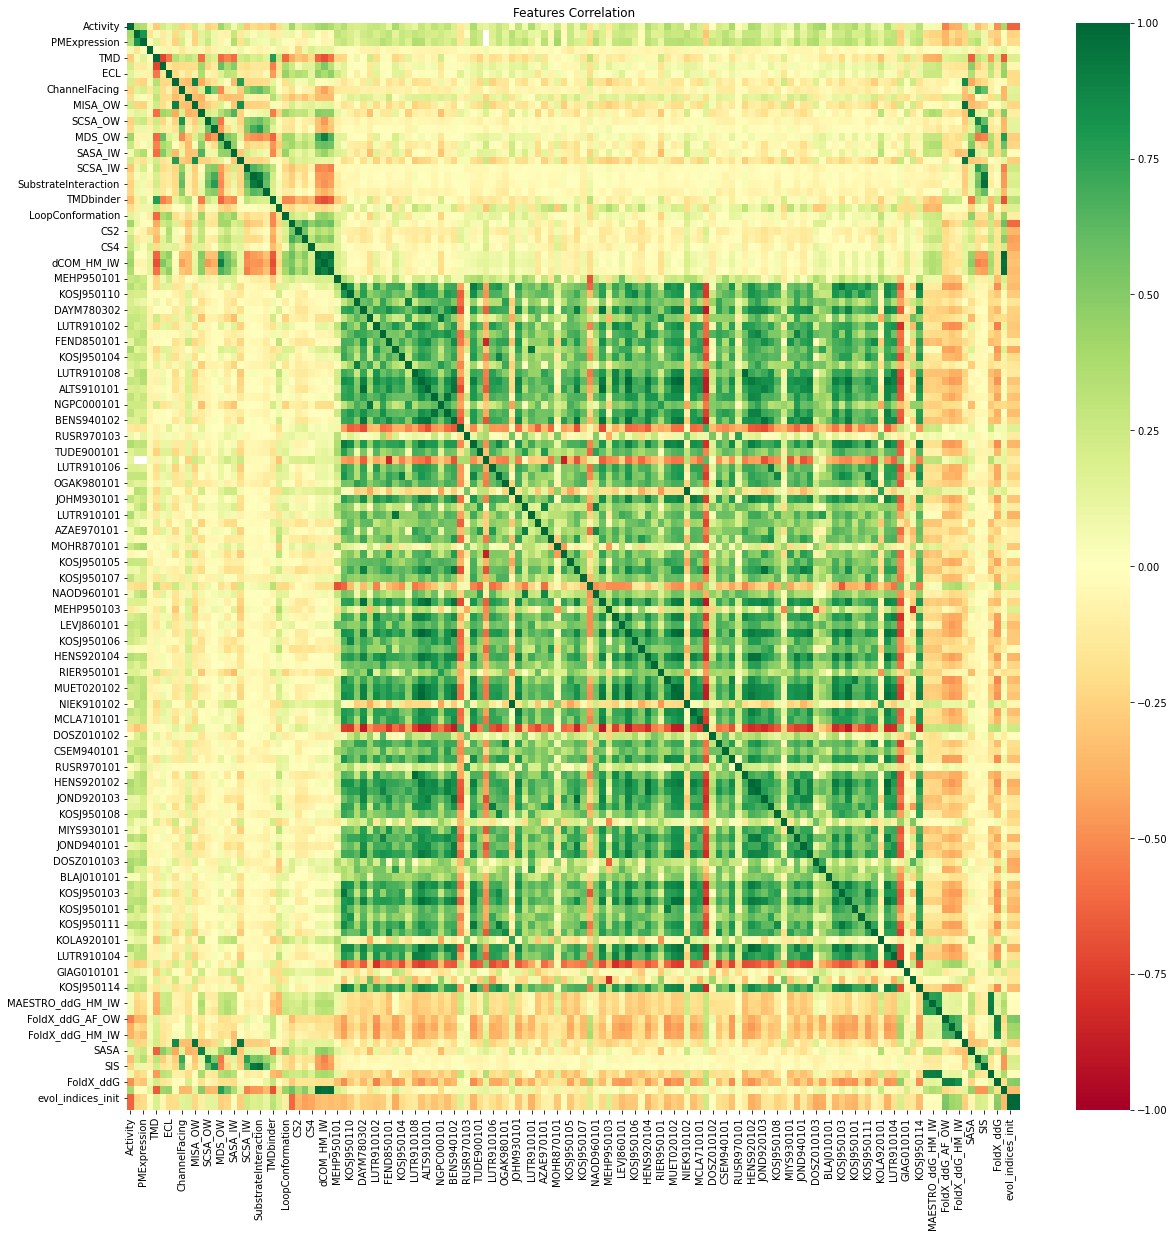

In [68]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, cmap="RdYlGn")
plt.yticks(rotation=0)
plt.title('Features Correlation')
#plt.savefig('MCT8_features_correlation_T4.png')
plt.show()

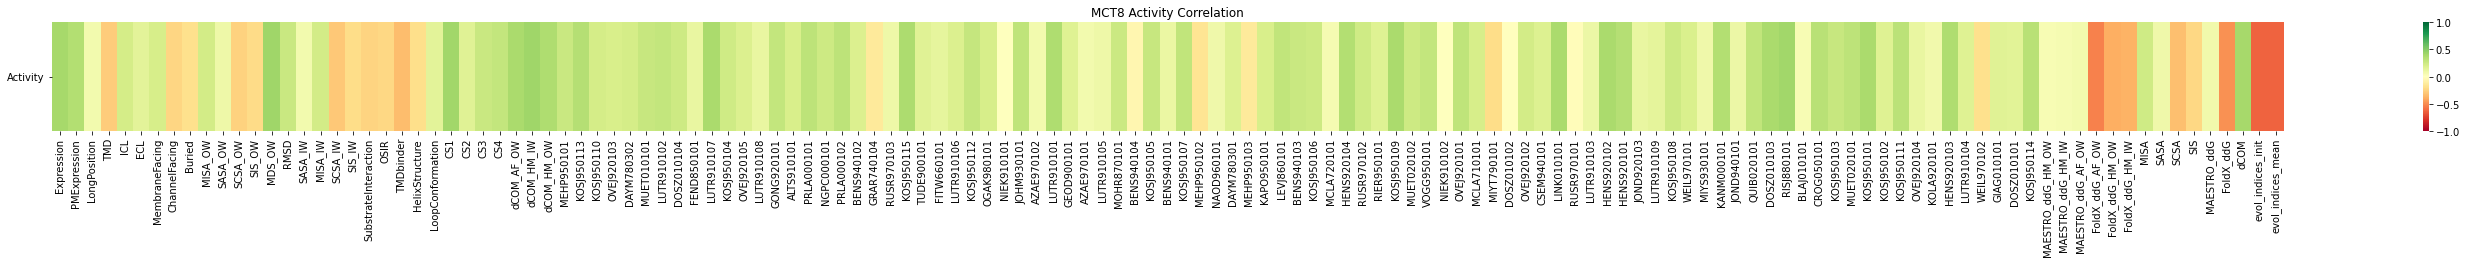

In [69]:
plt.figure(figsize=(50, 2))
sns.heatmap(activity_correlation, vmin=-1, vmax=1, cmap="RdYlGn")
plt.yticks(rotation=0)
plt.title('MCT8 Activity Correlation')
#plt.savefig('MCT8_Activity_correlation_full_T4.png')
plt.show()

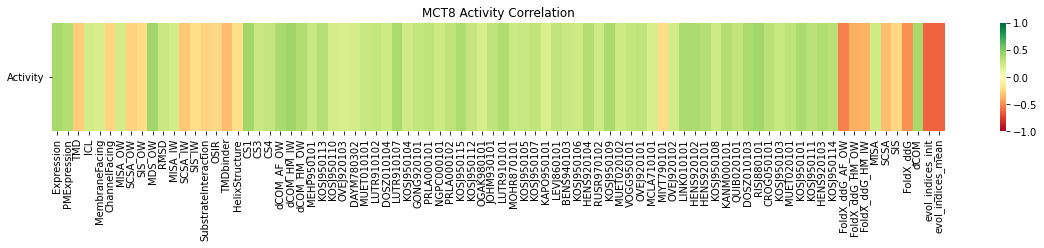

In [70]:
# Plot of the most correlated features
plt.figure(figsize=(20,2))
sns.heatmap(activity_correlation[(activity_correlation<-0.2) | (activity_correlation>0.2)].dropna(axis=1), vmin=-1, vmax=1, cmap="RdYlGn")
plt.yticks(rotation=0)
plt.title('MCT8 Activity Correlation')
#plt.savefig('MCT8_Activity_correlation_top_T4.png', bbox_inches='tight')
plt.show()

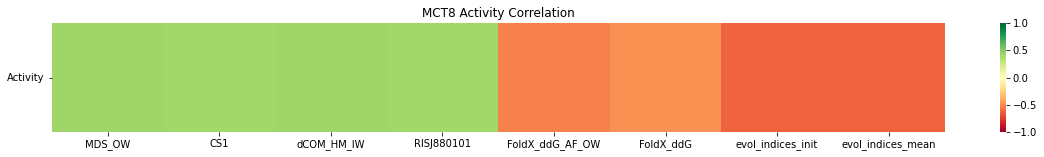

In [71]:
# Plot of the most correlated features
plt.figure(figsize=(20,2))
sns.heatmap(activity_correlation[(activity_correlation<-0.4) | (activity_correlation>0.4)].dropna(axis=1), vmin=-1, vmax=1, cmap="RdYlGn")
plt.yticks(rotation=0)
plt.title('MCT8 Activity Correlation')
#plt.savefig('MCT8_Activity_correlation_toptop_T4.png', bbox_inches='tight')
plt.show()

The higher correlation is seen between variant activity and the evol_indices from eve_scores

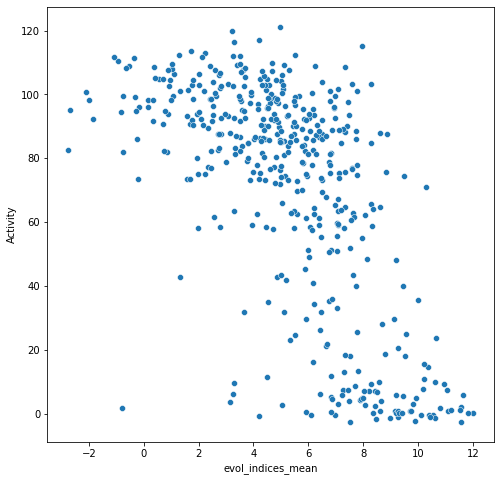

In [72]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=mct8_EDA, x='evol_indices_mean', y='Activity')
#plt.savefig('MCT8_Activity_vs_eve_T4.png')
plt.show()

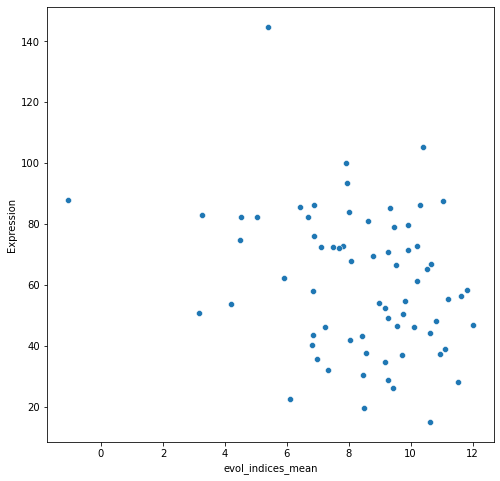

In [73]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=mct8_EDA, x='evol_indices_mean', y='Expression')
#plt.savefig('MCT8_Expression_vs_eve_T4.png')
plt.show()

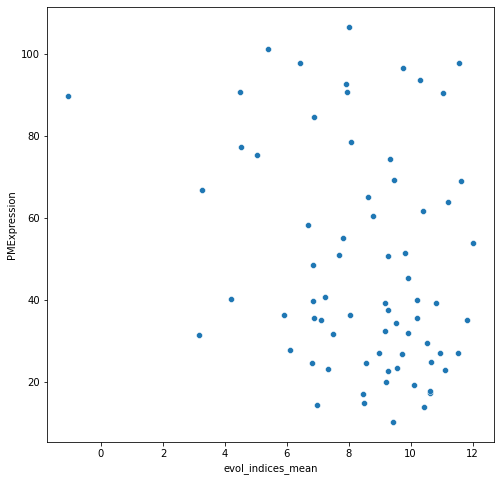

In [74]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=mct8_EDA, x='evol_indices_mean', y='PMExpression')
#plt.savefig('MCT8_PMExpression_vs_eve_T4.png')
plt.show()

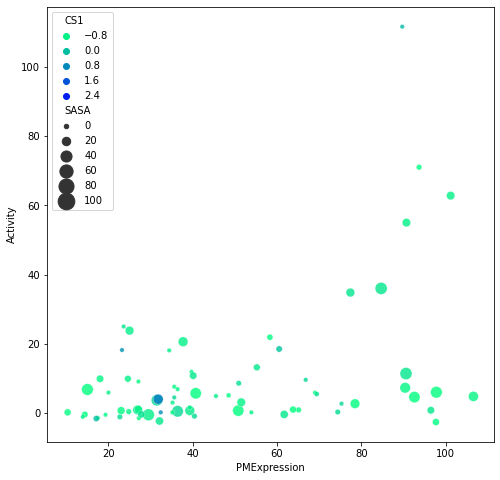

In [75]:
# Scatter plot Activity vs Plasma Membrane expression.
# Both features are correlated, but there are some mutants that reach the plasma membrane
# but have reduced activity
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']-8.5, point['y']-1, str(point['val']))

plt.figure(figsize=(8,8))
sns.scatterplot(data=mct8_EDA, x='PMExpression', y='Activity', hue='CS1', palette='winter_r',
                size='SASA', sizes=(20,300), alpha=0.8)
#plt.savefig('MCT8_Activity_vs_PMexpression_T4.png')
plt.show()

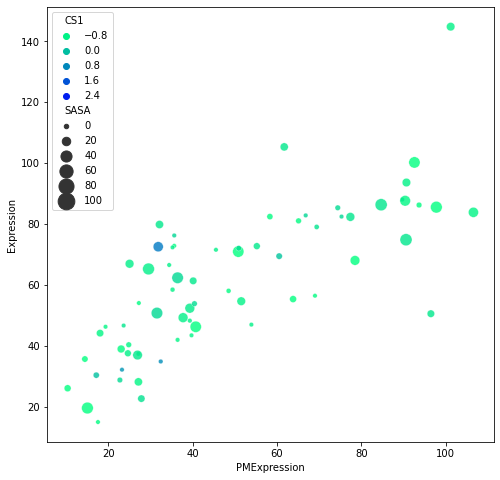

In [76]:
# Scatter plot Expression vs Plasma Membrane expression.

plt.figure(figsize=(8,8))
sns.scatterplot(data=mct8_EDA, x='PMExpression', y='Expression', hue='CS1', palette='winter_r',
                size='SASA', sizes=(20,300), alpha=0.8)
#plt.savefig('MCT8_Expression_vs_PMexpression_T4.png')
plt.show()

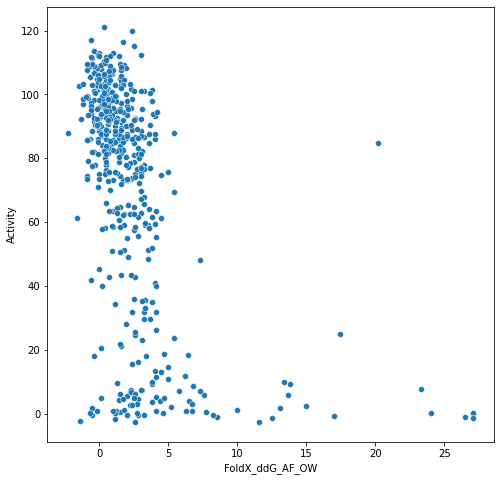

In [77]:
#  Scatter plot ddG vs Plasma Membrane expression.

plt.figure(figsize=(8,8))
sns.scatterplot(data=mct8_EDA, x='FoldX_ddG_AF_OW', y='Activity')
#plt.savefig('MCT8_Activity_vs_ddG_T4.png')
plt.show()

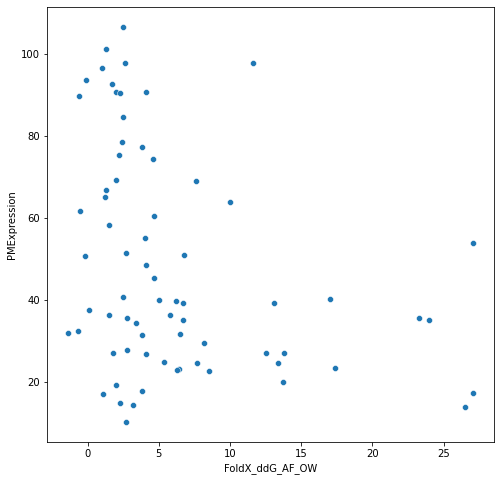

In [78]:
# Scatter plot ddG vs Plasma Membrane expression.

plt.figure(figsize=(8,8))
sns.scatterplot(data=mct8_EDA, x='FoldX_ddG_AF_OW', y='PMExpression')
#plt.savefig('MCT8_PMExpression_vs_ddG_T4.png')
plt.show()

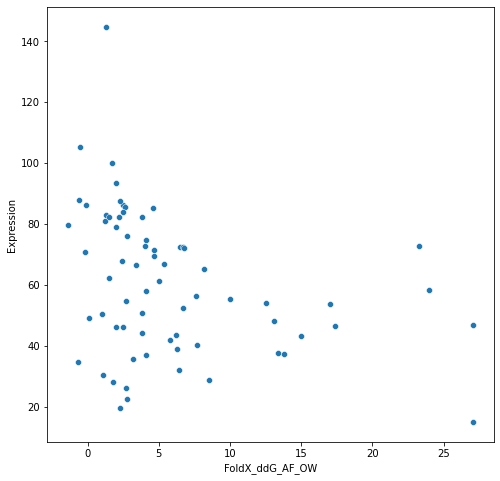

In [79]:
# Scatter plot ddG vs Expression.

plt.figure(figsize=(8,8))
sns.scatterplot(data=mct8_EDA, x='FoldX_ddG_AF_OW', y='Expression')
#plt.savefig('MCT8_Expression_vs_ddG_T4.png')
plt.show()

As expected, there is a linear correlation between protein expression and protein plasma membrane expression.

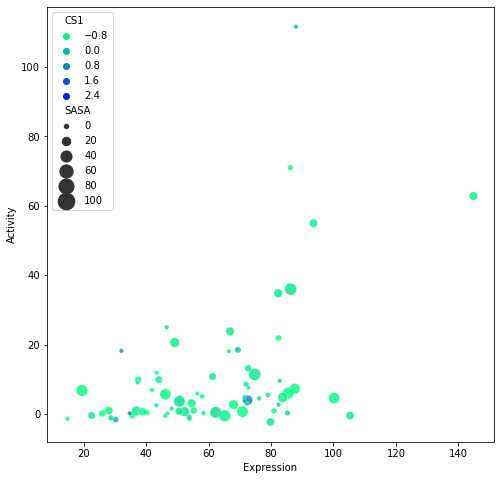

In [80]:
# Scatter plot Activity vs Expression.

plt.figure(figsize=(8,8))
sns.scatterplot(data=mct8_EDA, x='Expression', y='Activity', hue='CS1', palette='winter_r',
                size='SASA', sizes=(20,300), alpha=0.8)
#plt.savefig('MCT8_Activity_vs_Expression_T4.png')
plt.show()

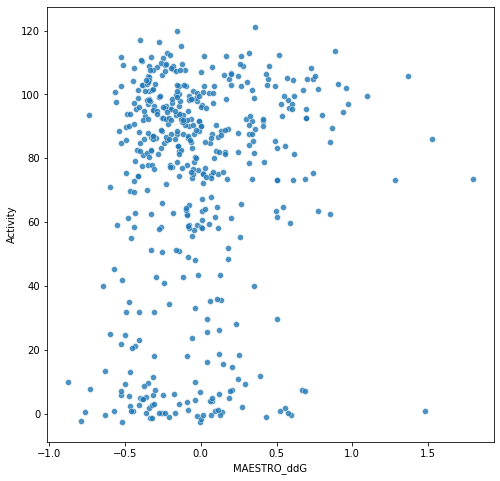

In [81]:
# Scatter plot Activity vs ddG.

plt.figure(figsize=(8,8))
sns.scatterplot(data=mct8_EDA, x='MAESTRO_ddG', y='Activity', alpha=0.8)
#plt.savefig('MCT8_Activity_vs_MAESTROddG_T4.png')
plt.show()

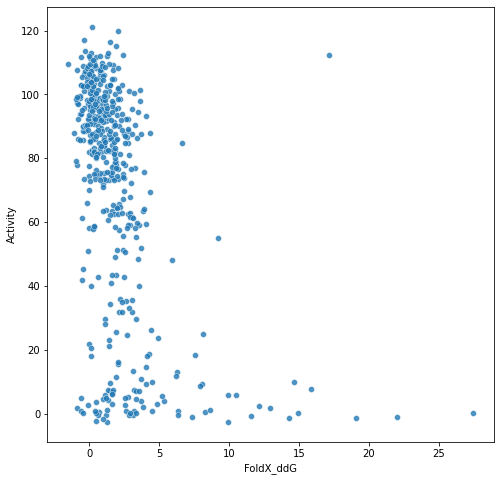

In [82]:
# Scatter plot Activity vs ddG.

plt.figure(figsize=(8,8))
sns.scatterplot(data=mct8_EDA, x='FoldX_ddG', y='Activity', alpha=0.8)
#plt.savefig('MCT8_Activity_vs_FoldXddG_T4.png')
plt.show()

As we can see here, there are many variants with loss of activity but having ddG values below 0... this is strange!

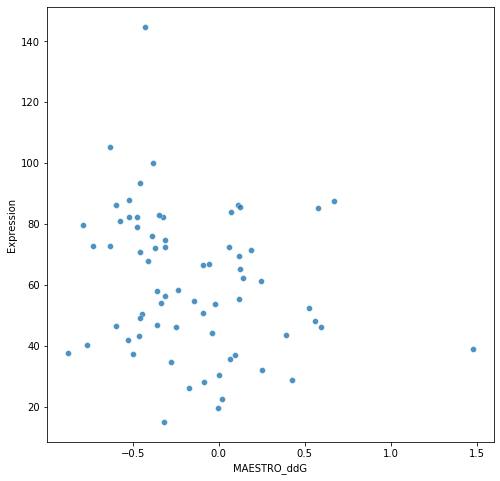

In [83]:
# Scatter plot Expression vs ddG

plt.figure(figsize=(8,8))
sns.scatterplot(data=mct8_EDA, x='MAESTRO_ddG', y='Expression', alpha=0.8)
#plt.savefig('MCT8_Expression_vs_MAESTROddG_T4.png')
plt.show()

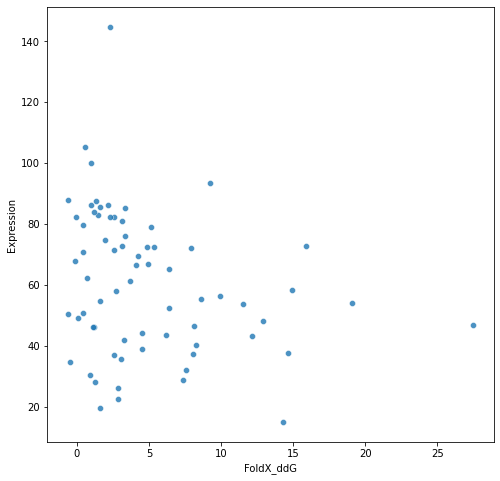

In [81]:
# Scatter plot Expression vs ddG

plt.figure(figsize=(8,8))
sns.scatterplot(data=mct8_EDA, x='FoldX_ddG', y='Expression', alpha=0.8)
#plt.savefig('MCT8_Expression_vs_FoldXddG_T4.png')
plt.show()

There is no correlation between protein expression and ddG... this is strange!

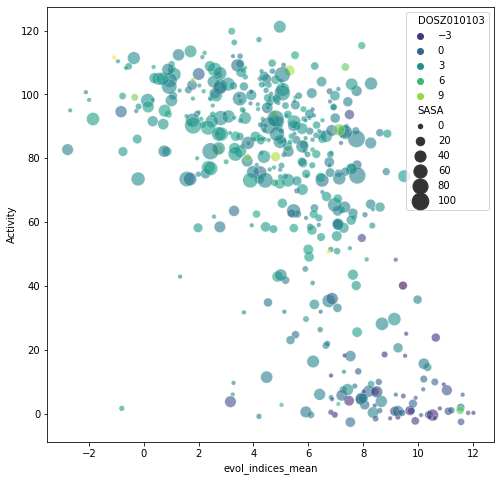

In [85]:
# Scatter plot Activity vs Conservation Score. 
# Coloured by the DOSZ010103 score: An amino acid similarity matrix based on the THREADER force field (Dosztanyi-Torda, 2001)
plt.figure(figsize=(8, 8))
sns.scatterplot(data=mct8_EDA, x='evol_indices_mean', y='Activity', hue='DOSZ010103', palette='viridis',
                size='SASA', sizes=(20, 300), alpha=.6)
#plt.savefig('MCT8_Activity_vs_evolindices_T4.png')
plt.show()

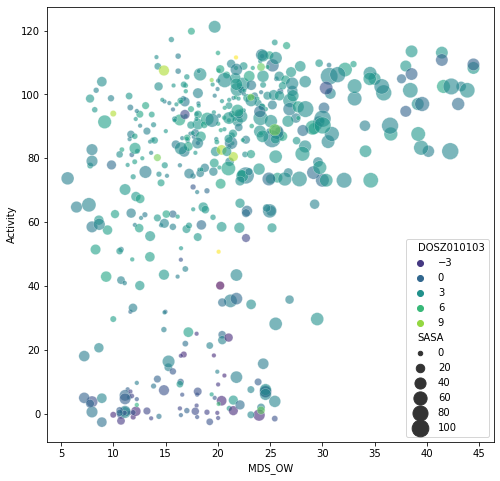

In [86]:
# Scatter plot Activity vs distance to Center of Mass. 
# Coloured by the DOSZ010103 score: An amino acid similarity matrix based on the THREADER force field (Dosztanyi-Torda, 2001)
plt.figure(figsize=(8,8))
sns.scatterplot(data=mct8_EDA, x='MDS_OW', y='Activity', hue='DOSZ010103', palette='viridis',
                size='SASA', sizes=(20, 300), alpha=.6)
#plt.savefig('MCT8_Activity_vs_MDS_T4.png')
plt.show()

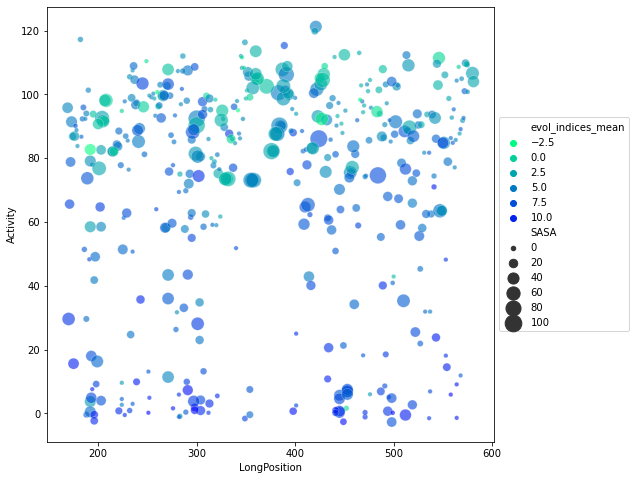

In [87]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=mct8_EDA, x="LongPosition", y="Activity", hue='evol_indices_mean', palette='winter_r',
                size='SASA', sizes=(20,300), alpha=.6)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig('MCT8_Activity_vs_LongPosition_T4.png', bbox_inches='tight')
plt.show()

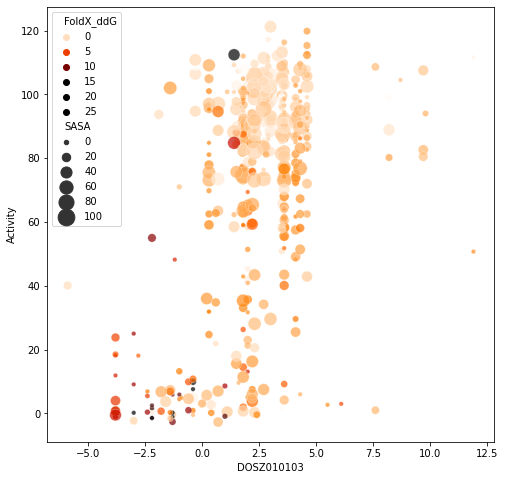

In [88]:
# Scatter plot Activity vs SASA. 
# Coloured by the DOSZ010103 score: An amino acid similarity matrix based on the THREADER force field (Dosztanyi-Torda, 2001)
plt.figure(figsize=(8,8))
sns.scatterplot(data=mct8_EDA, x='DOSZ010103', y='Activity', hue='FoldX_ddG', palette='gist_heat_r', hue_norm=(-1, 15),
                size='SASA', sizes=(20, 300), alpha=.7)
#plt.savefig('MCT8_Activity_vs_DOSZ010103_T4.png')
plt.show()

----